# GAE benchmark history results

In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## AN2VEC

In [2]:
results = pd.read_csv('../data/behaviour/gae-benchmarks/lp-bias=[true, false]-sharedl1=[true, false]-'
                      'decadjdeep=[true, false]-dataset=[cora, citeseer, pubmed]-'
                      'overlap=[0, 8, 16]-testprop=[0.15, 0.30]-nsamples=10.csv.gz',
                      compression='gzip')

### Shared l1

In [3]:
results.loc[results['feat'] > 10, 'feat'] = np.nan
results.loc[results['total loss'] > 10, 'total loss'] = np.nan

/home/sl/.conda/envs/base36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


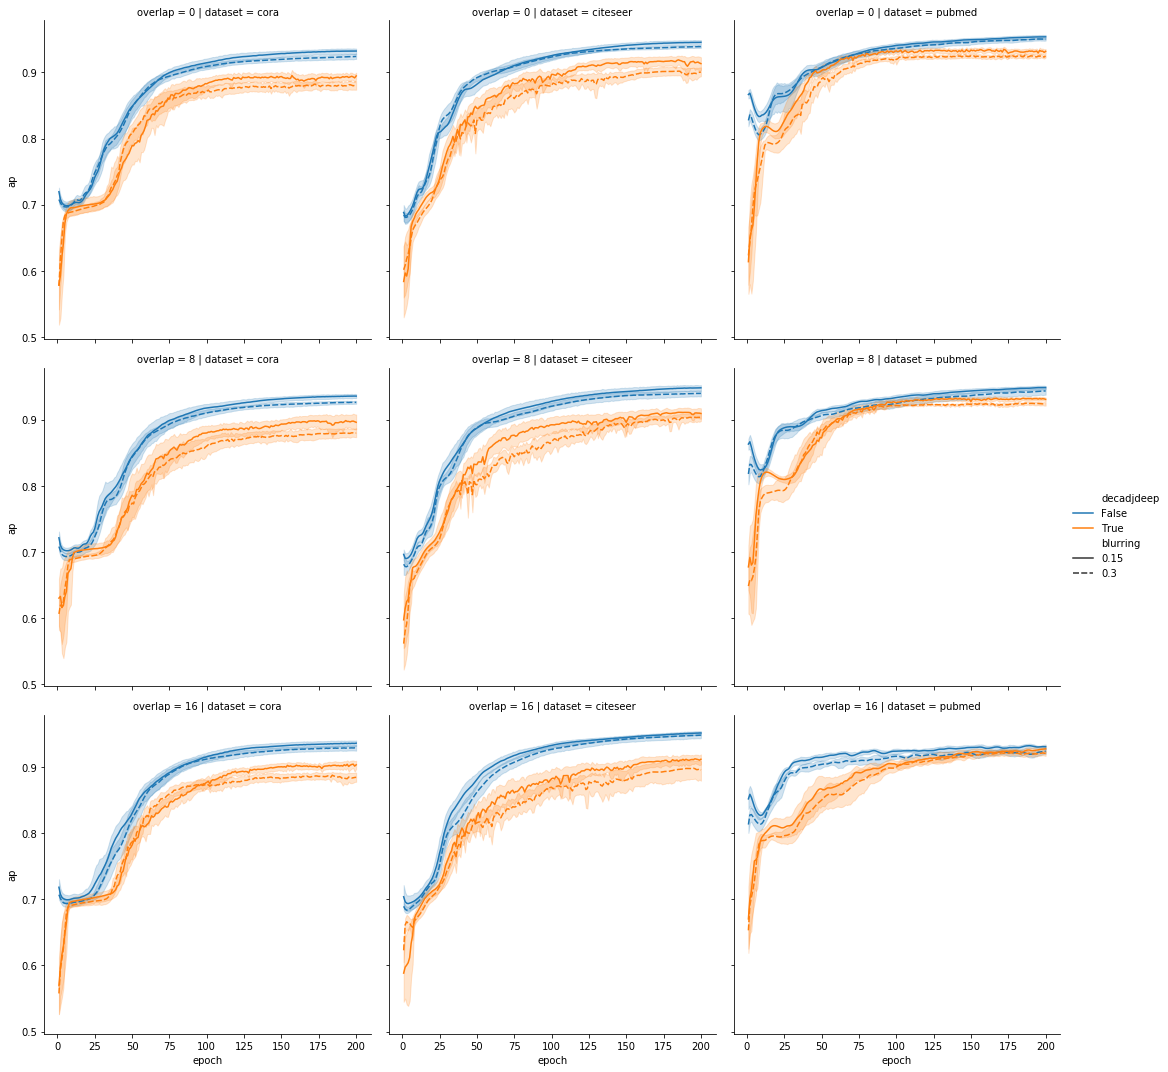

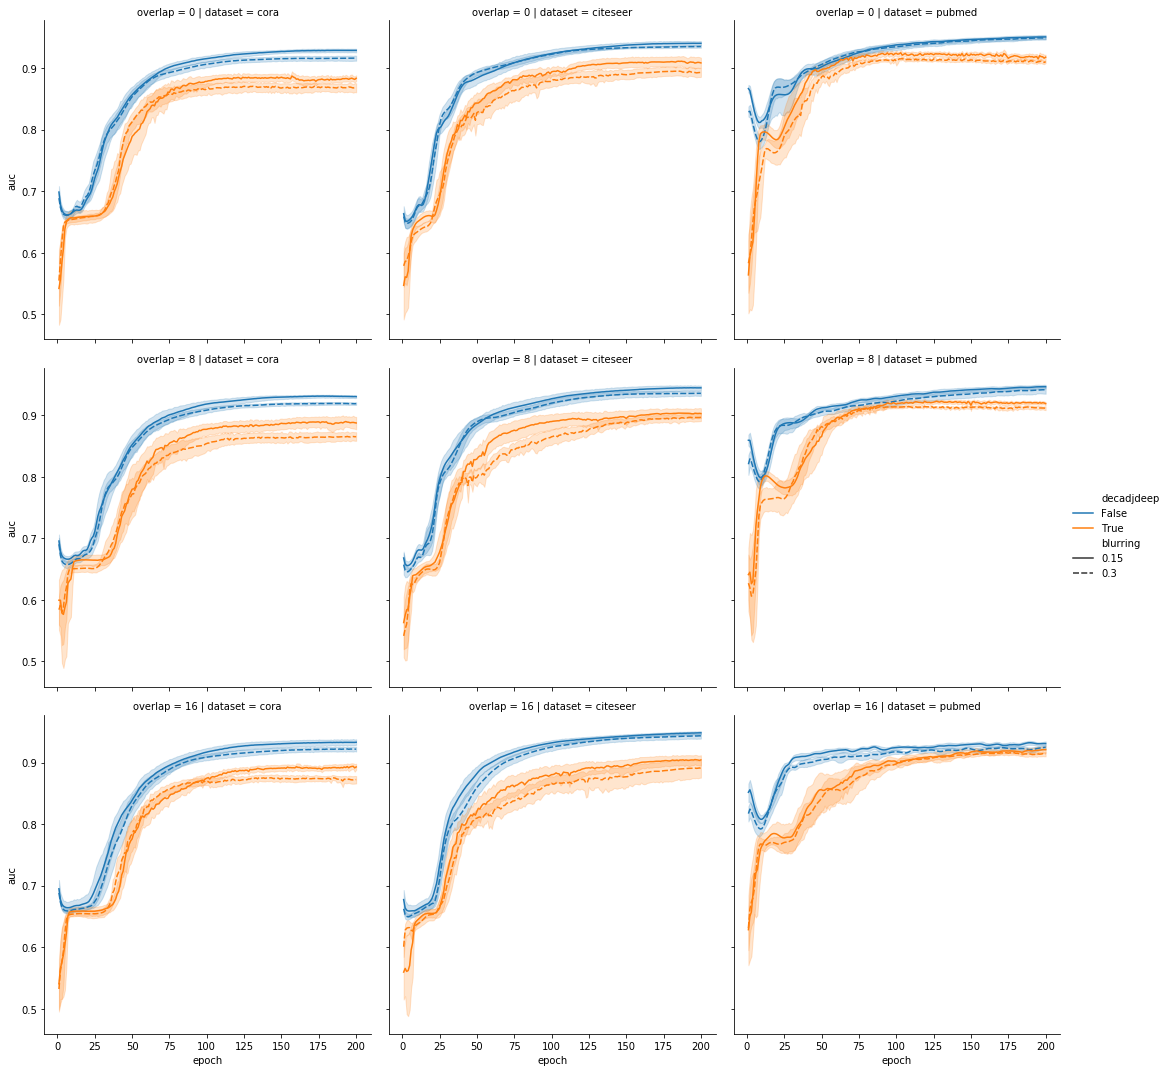

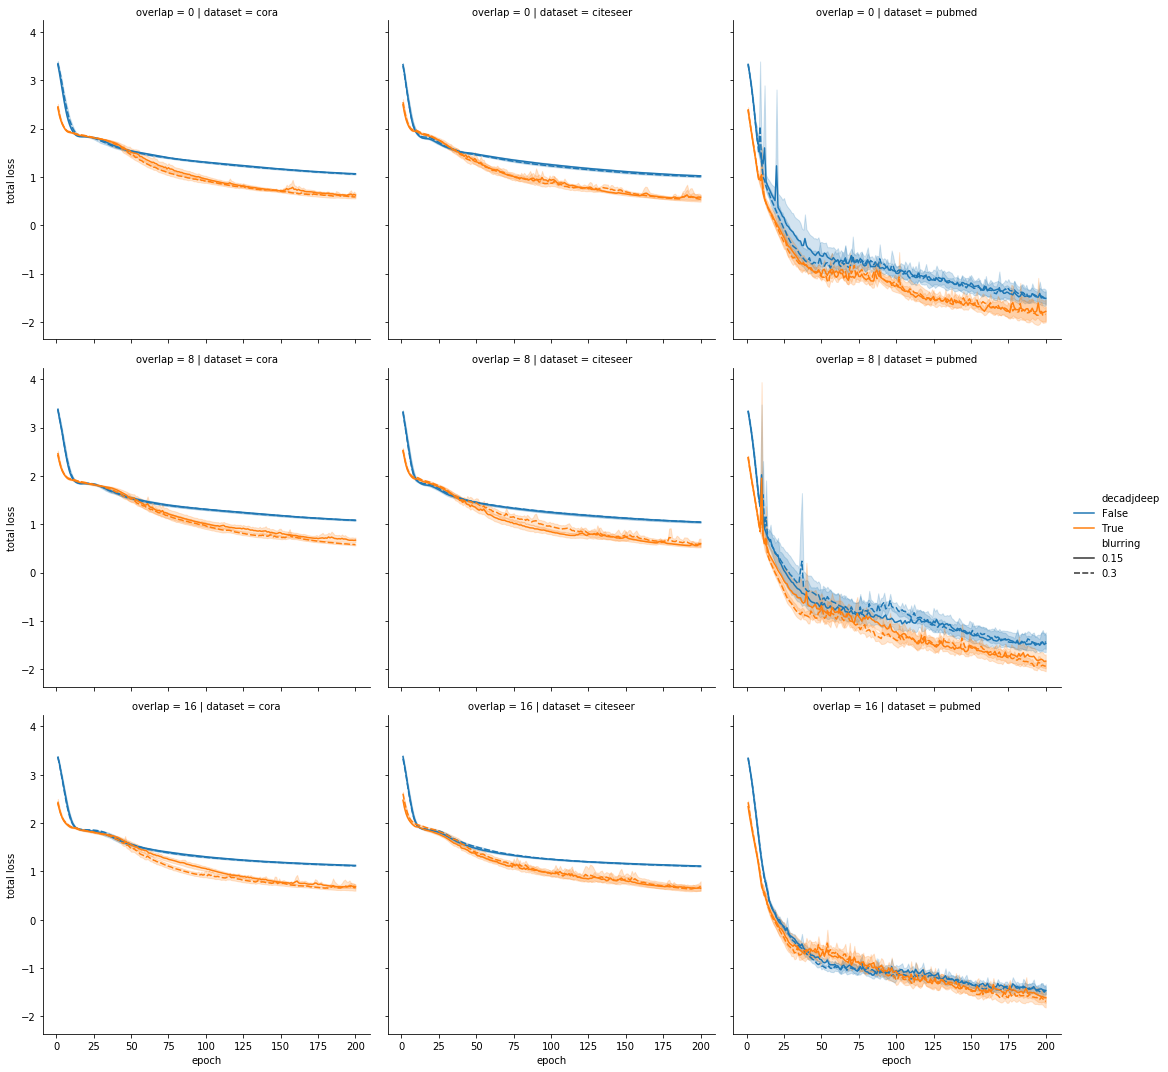

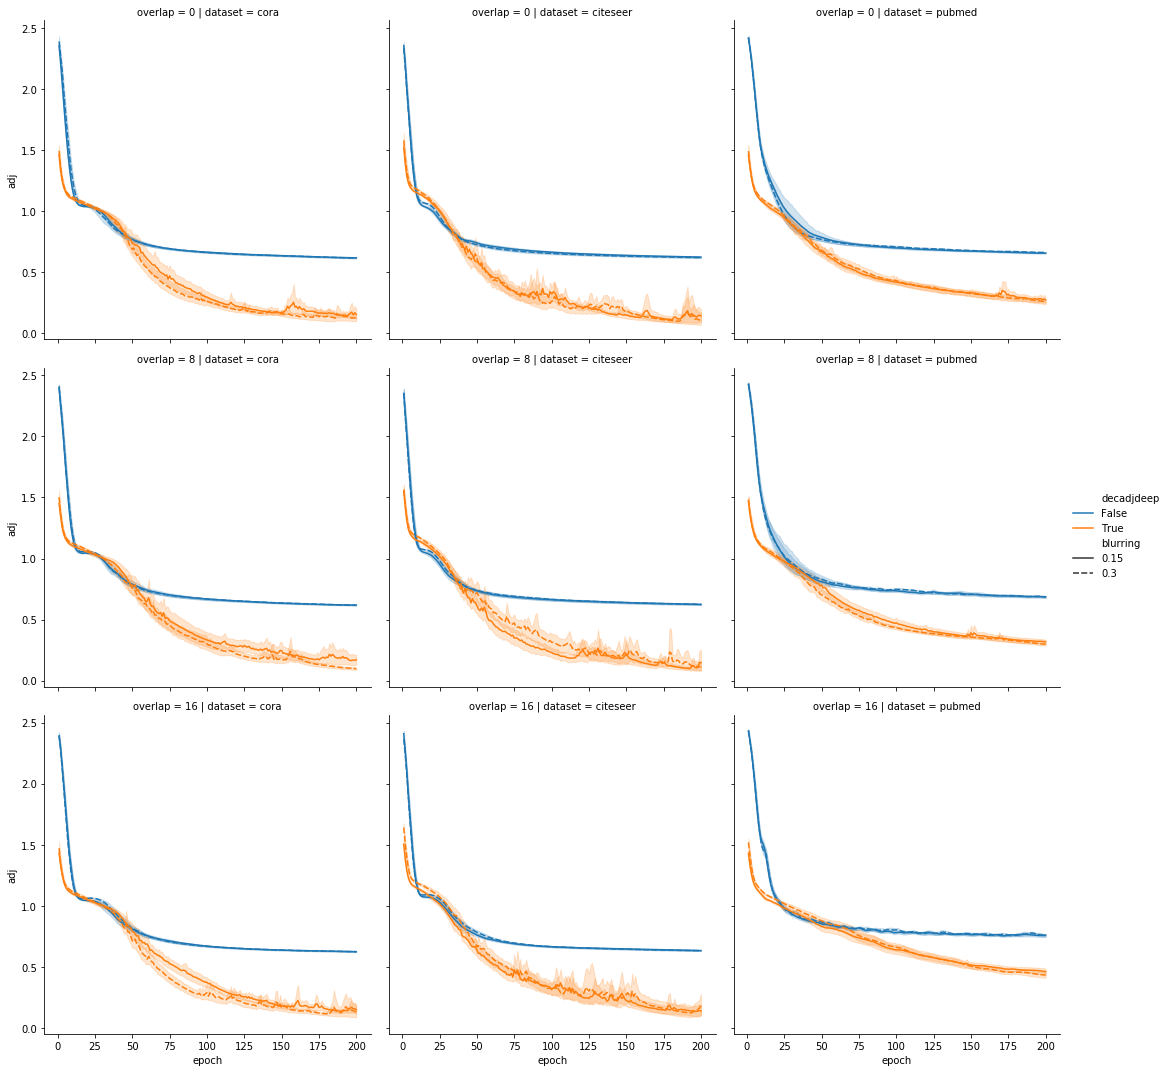

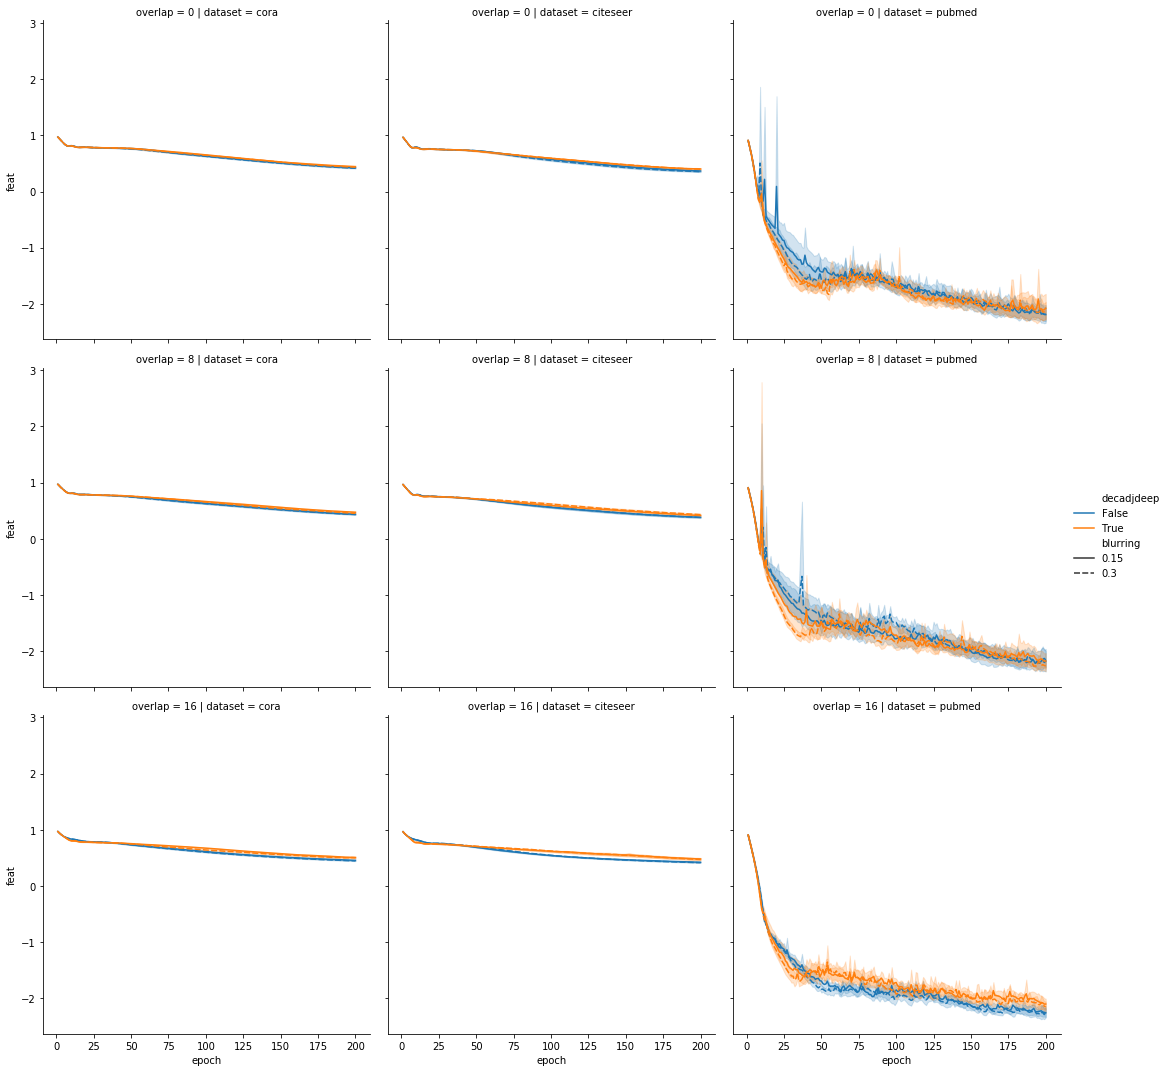

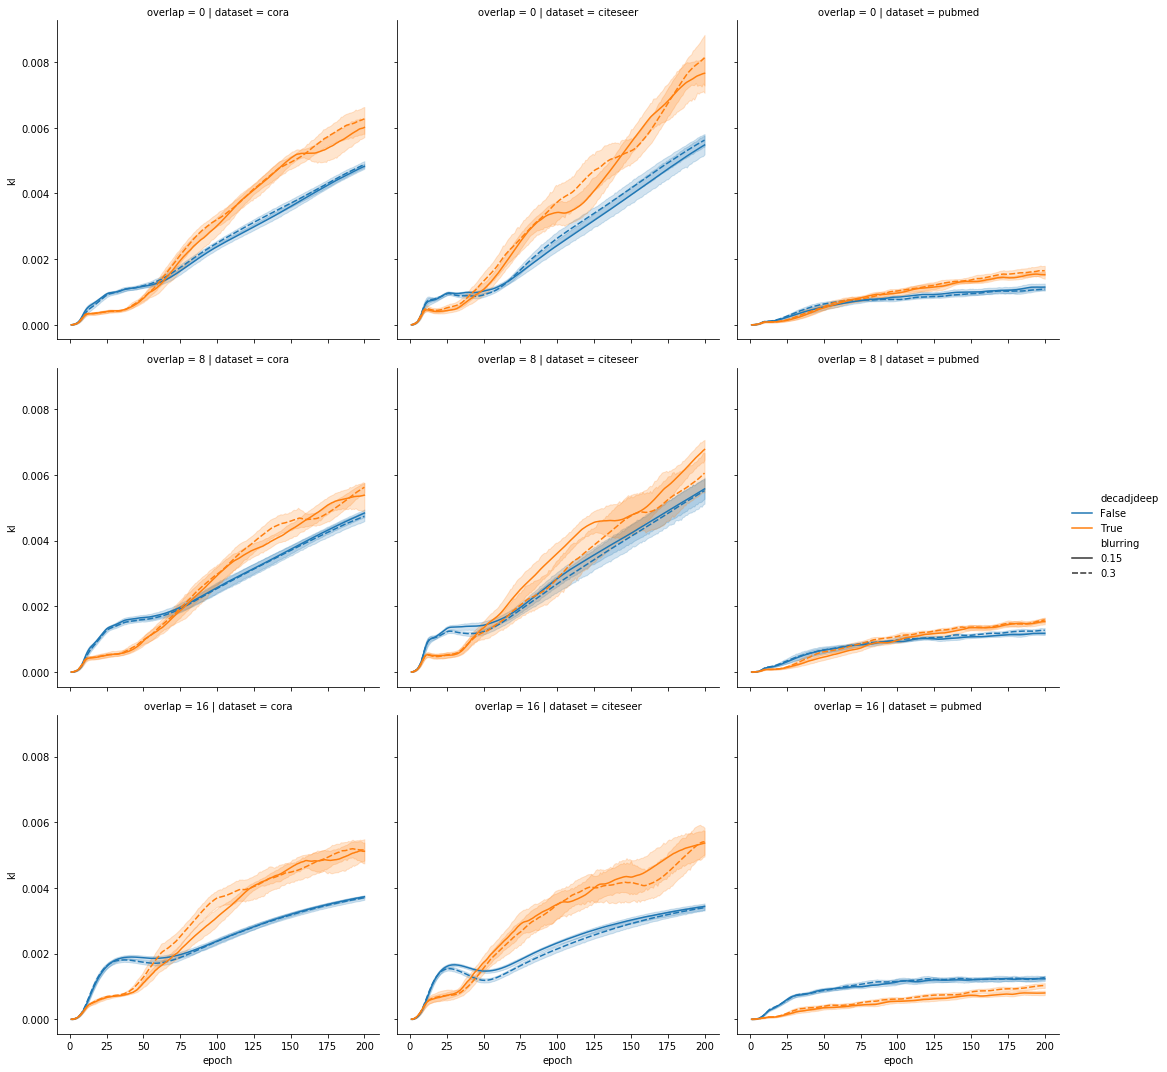

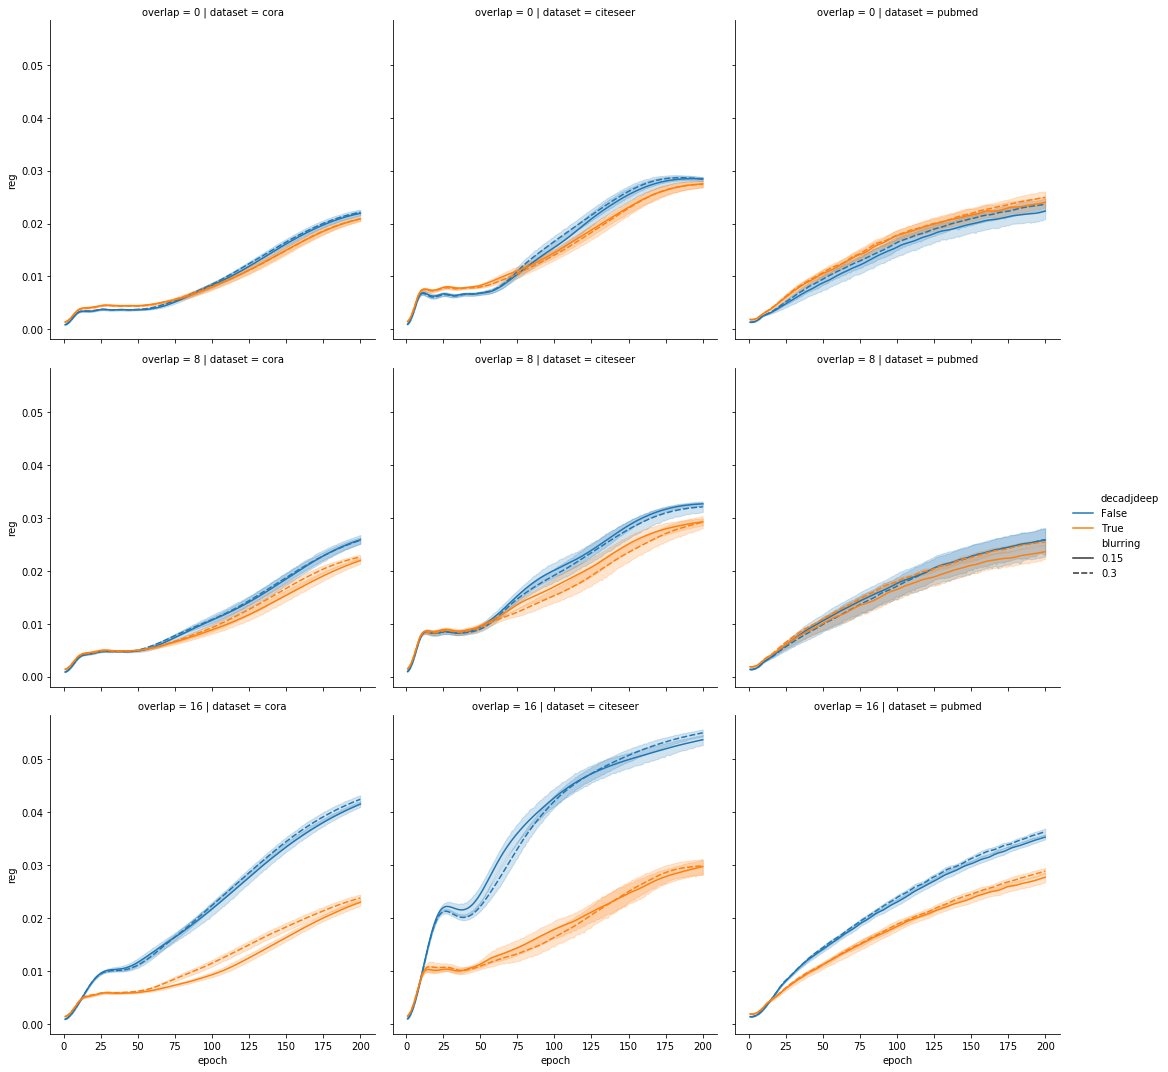

In [4]:
for var_name in ['ap', 'auc', 'total loss', 'adj', 'feat', 'kl', 'reg']:
    sb.relplot(x='epoch', y=var_name,
               style='blurring', style_order=[0.15, 0.30],
               hue='decadjdeep', row='overlap',
               col='dataset', col_order=['cora', 'citeseer', 'pubmed'],
               data=results[(results.bias == False)
                            & (results.sharedl1 == True)],
               kind='line')

### Unshared l1

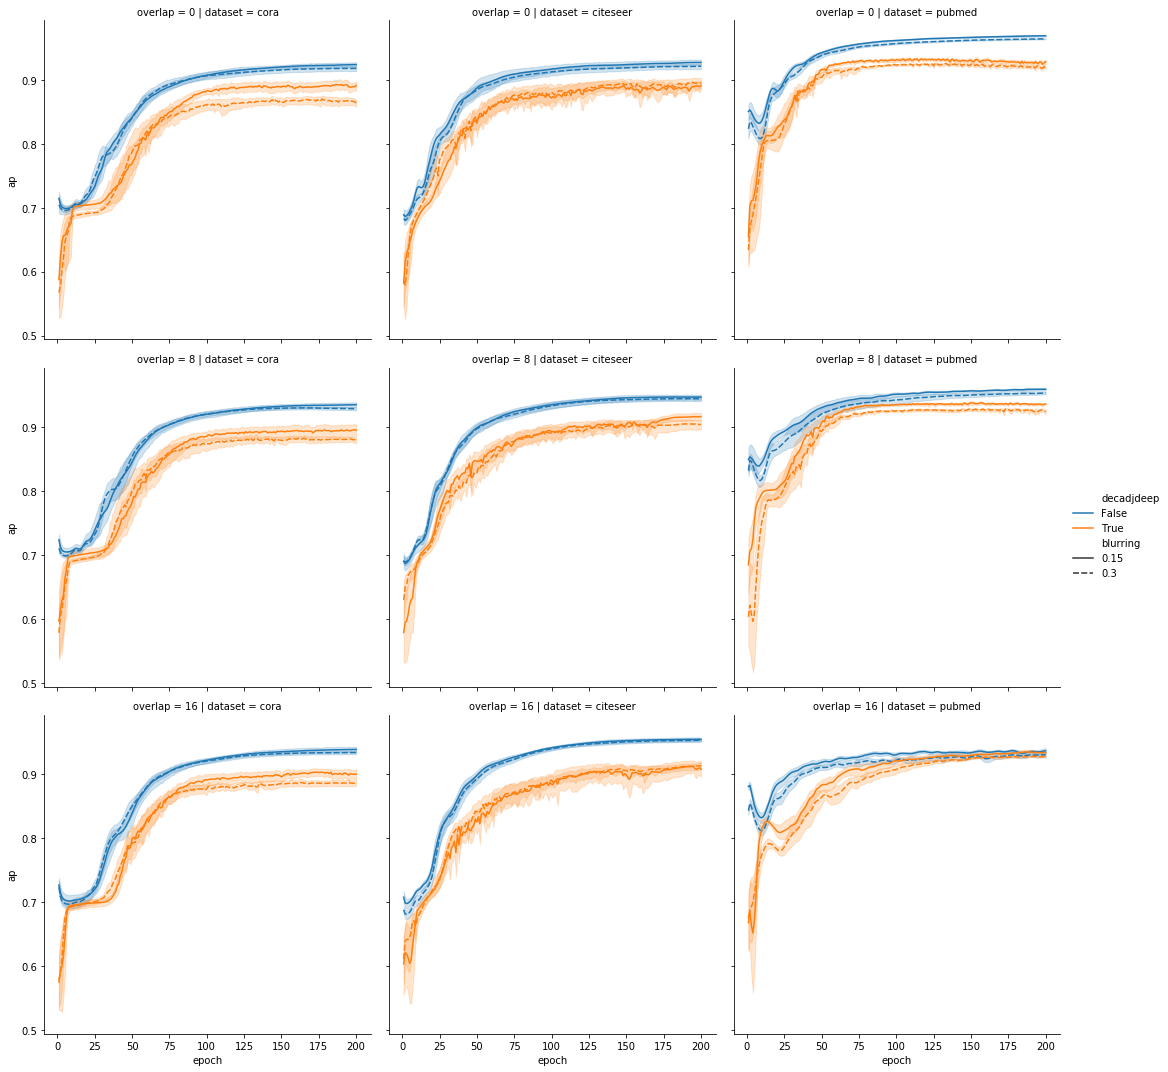

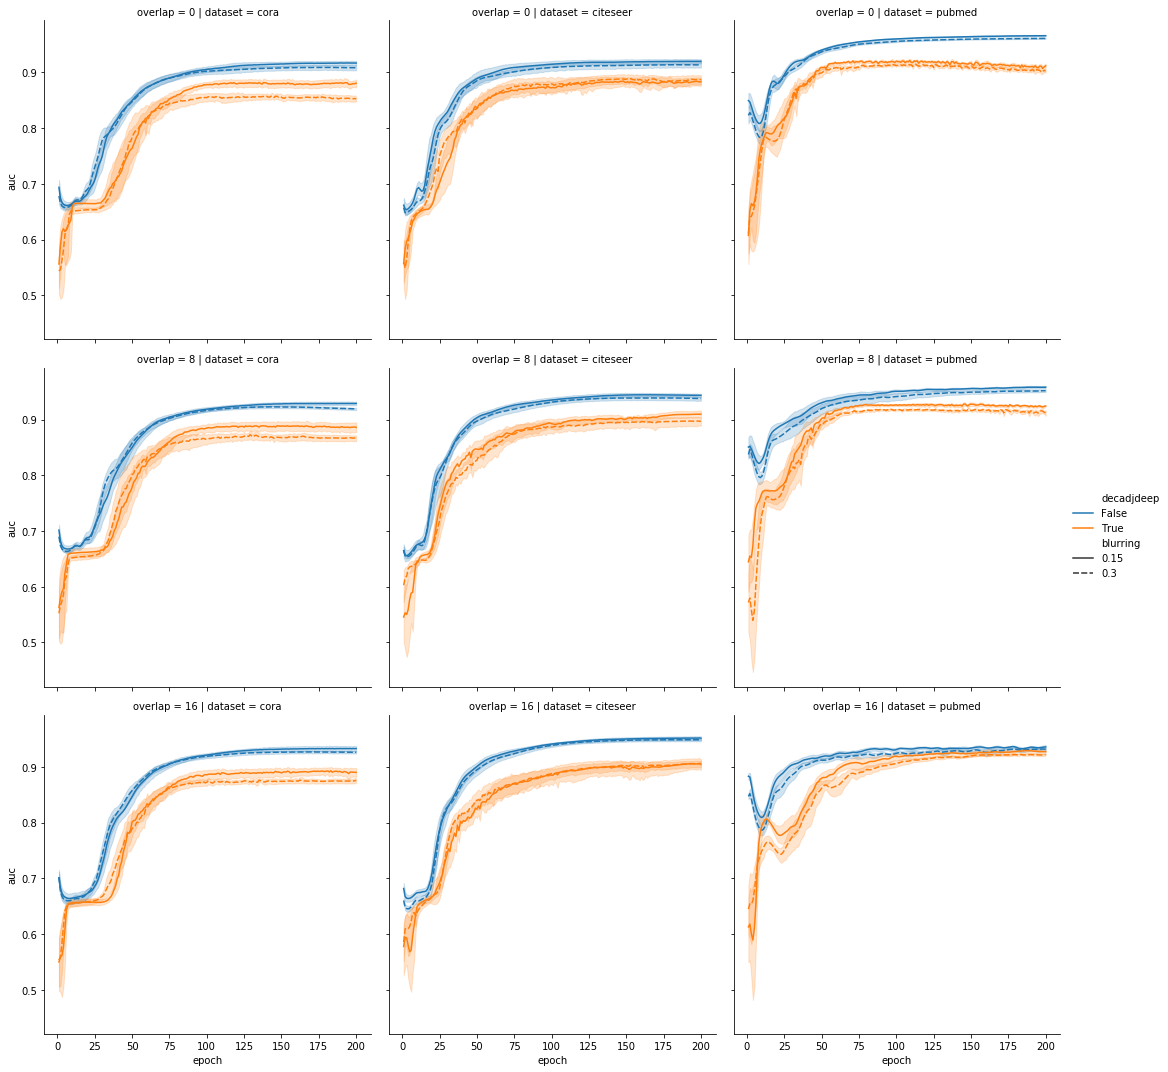

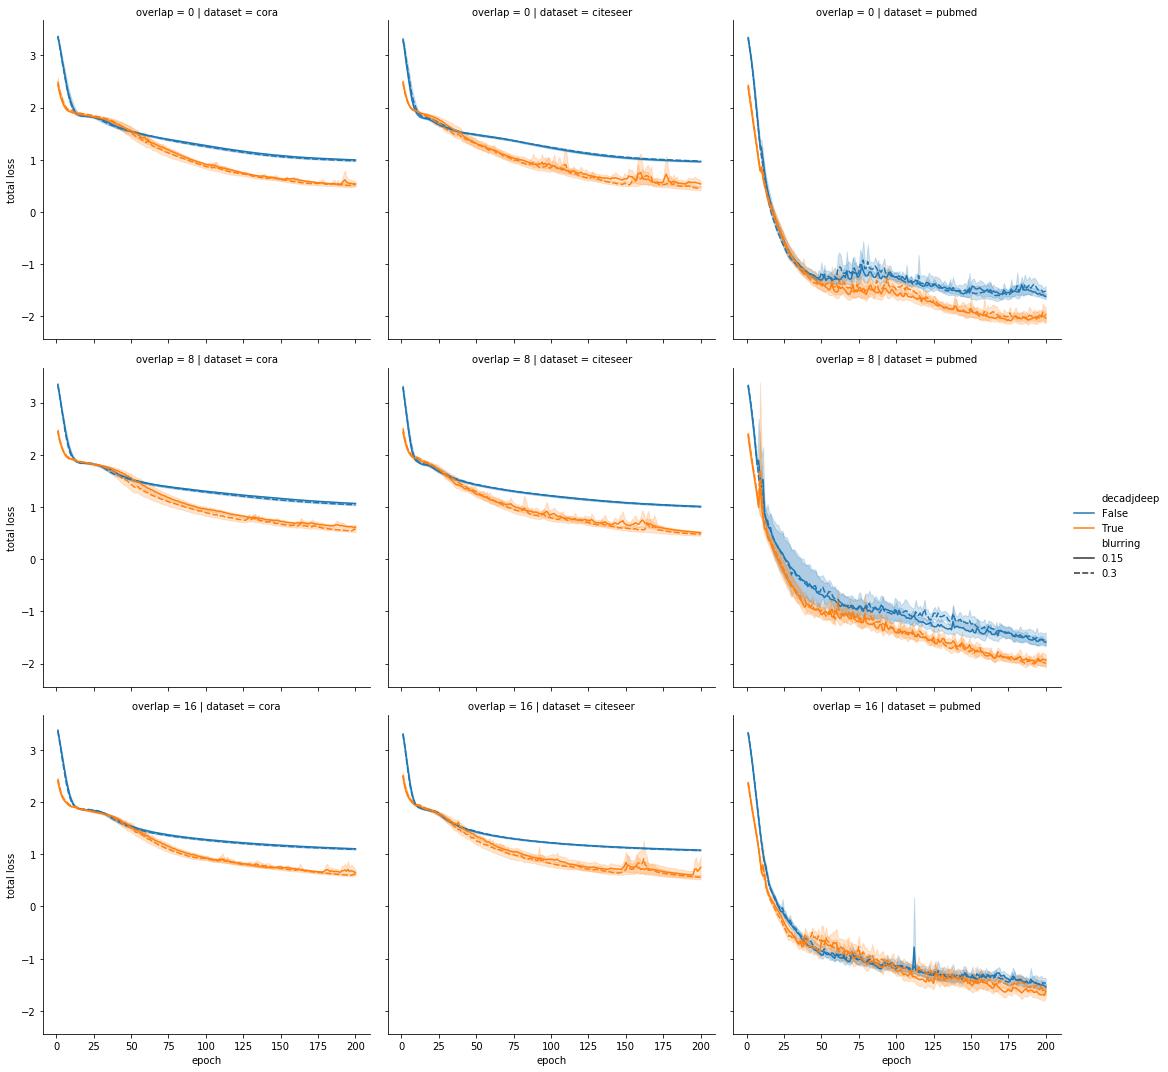

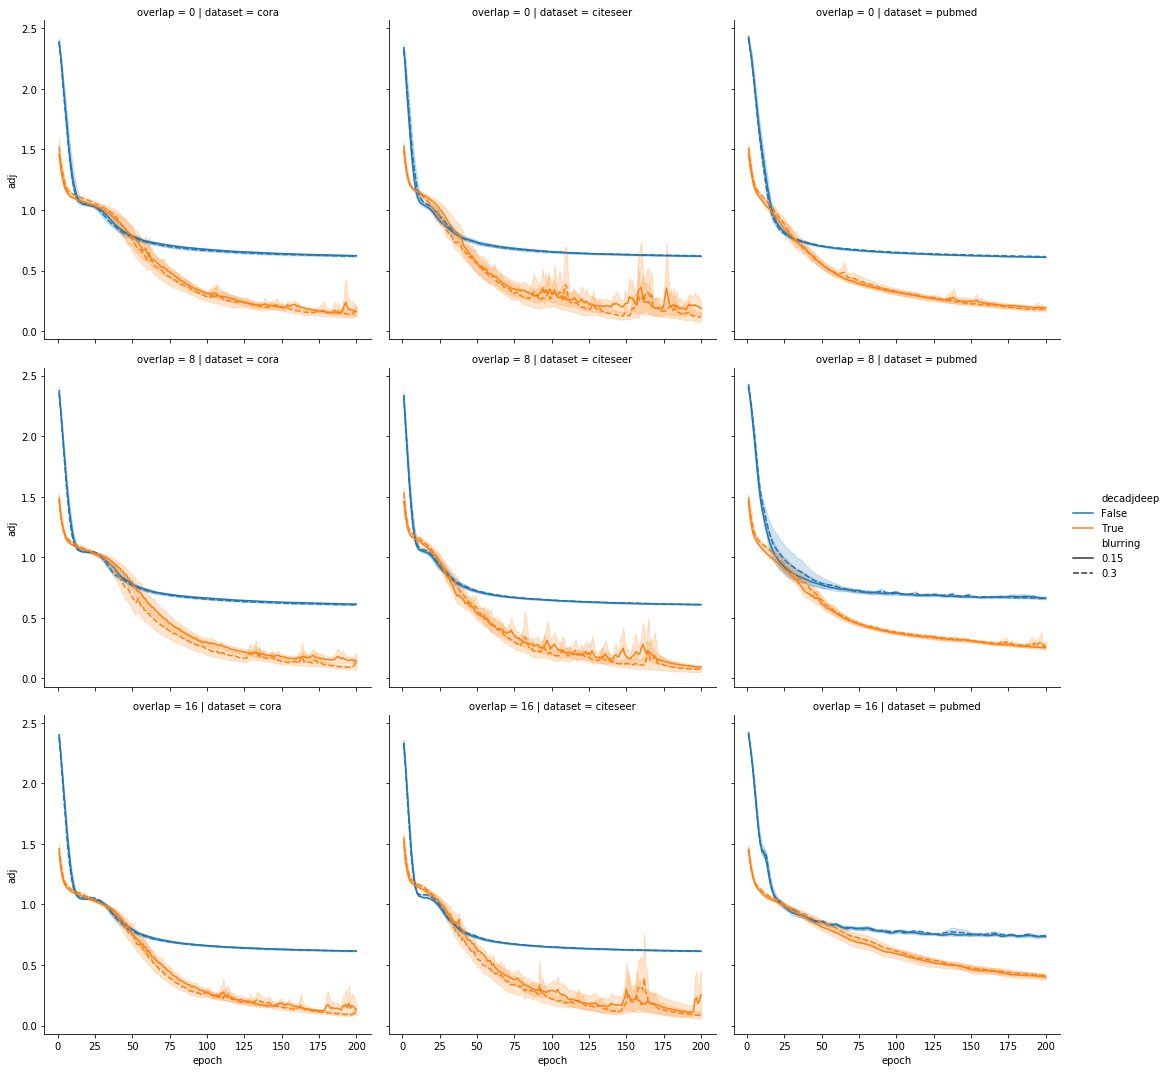

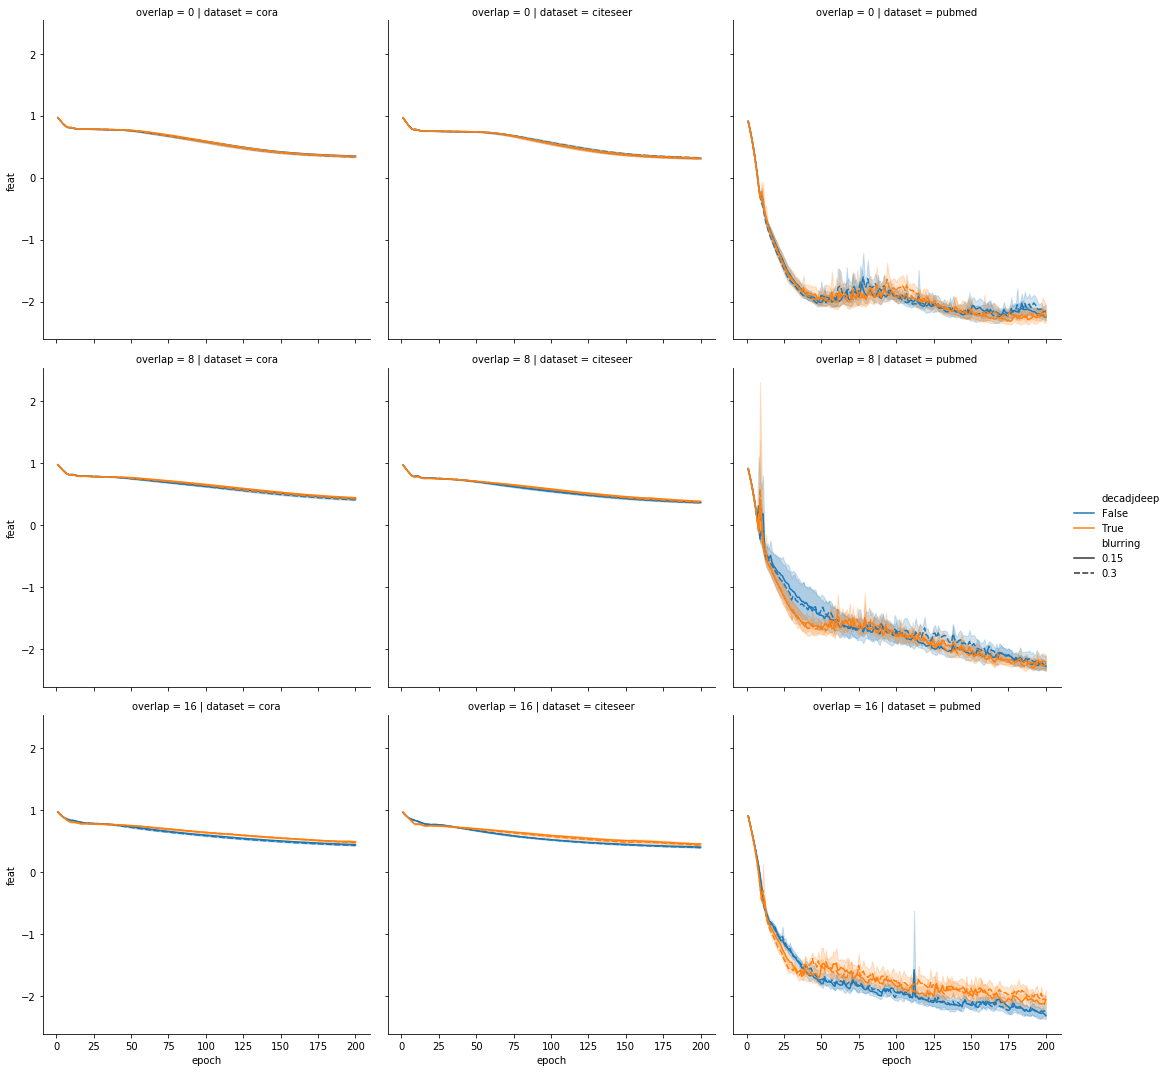

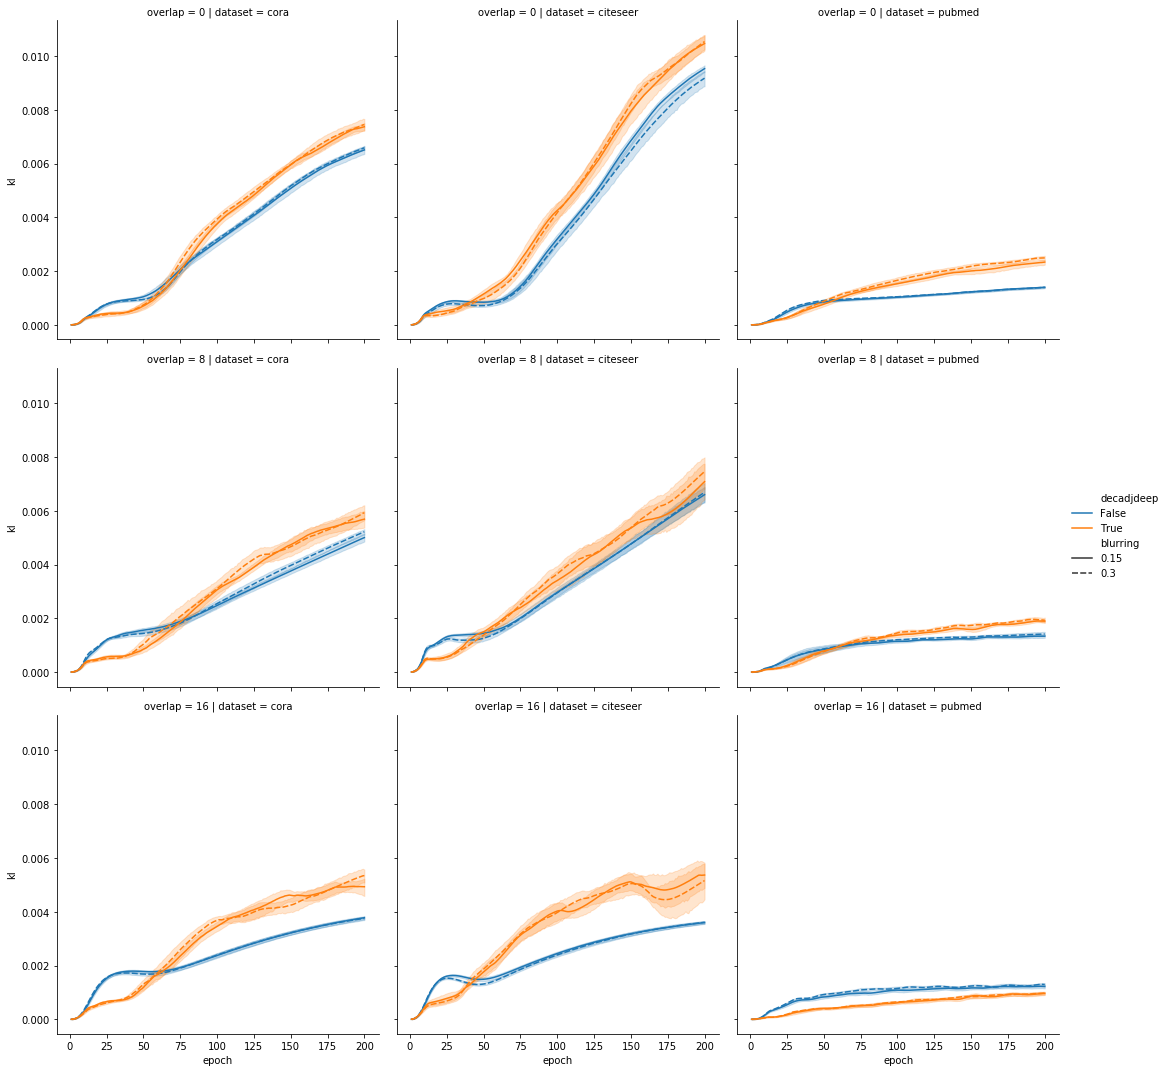

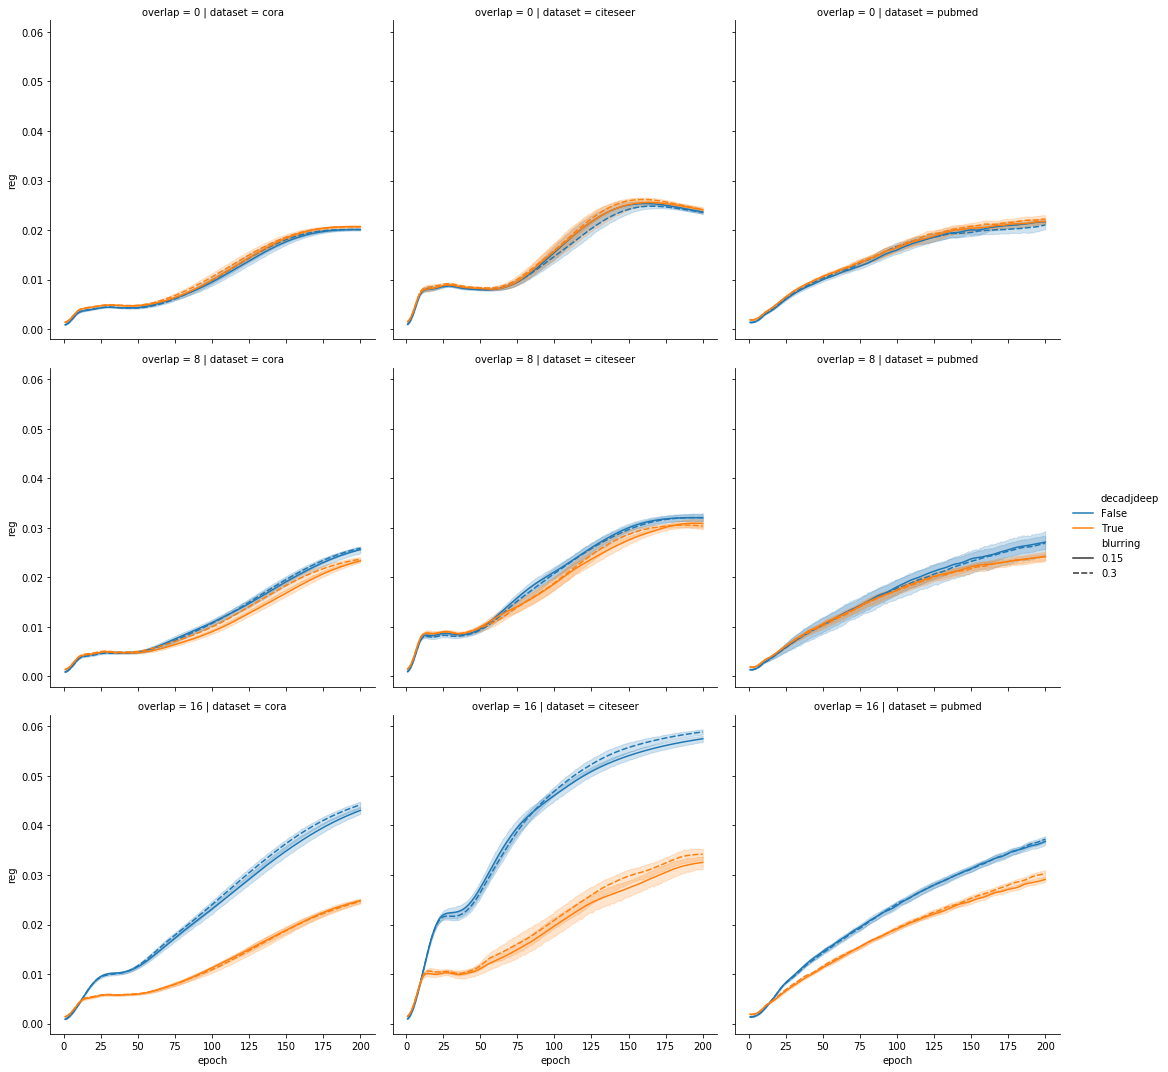

In [5]:
for var_name in ['ap', 'auc', 'total loss', 'adj', 'feat', 'kl', 'reg']:
    sb.relplot(x='epoch', y=var_name,
               style='blurring', style_order=[0.15, 0.30],
               hue='decadjdeep', row='overlap',
               col='dataset', col_order=['cora', 'citeseer', 'pubmed'],
               data=results[(results.bias == False)
                            & (results.sharedl1 == False)],
               kind='line')